In [37]:
# first, load the data in from a csv, pandas will work here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('dsci_power_outage_data.csv')

# look at the dataset, only three fields are missing the response variable. As such, I've choosen to remove those.
clean_data = data[data['Delay_Hours'].notnull()]
clean_data = data[data['System Voltage'].notnull()]
clean_data = data[data['System_Load (kW)'].notnull()]


# turn all categorical fields into factors
clean_data['Month_Categorized'] = clean_data['Month'].astype('category')
clean_data['Month_Categorized'] = clean_data['Month_Categorized'].cat.codes

clean_data['System_Voltage_Categorized'] = clean_data['Month'].astype('category')
clean_data['System_Voltage_Categorized'] = clean_data['System_Voltage_Categorized'].cat.codes

clean_data['Failure_Code_Categorized'] = clean_data['Failure_Code'].astype('category')
clean_data['Failure_Code_Categorized'] = clean_data['Failure_Code_Categorized'].cat.codes

clean_data['Location_Categorized'] = clean_data['Location'].astype('category')
clean_data['Location_Categorized'] = clean_data['Location_Categorized'].cat.codes

independent_vars_names = ["Month_Categorized", "System_Voltage_Categorized", "Consumer_Effected", "Failure_Code_Categorized", "Location_Categorized"]


C:\Users\spenc\AppData\Local\Temp\ipykernel_15596\729452090.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Month_Categorized'] = clean_data['Month'].astype('category')
C:\Users\spenc\AppData\Local\Temp\ipykernel_15596\729452090.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Month_Categorized'] = clean_data['Month_Categorized'].cat.codes
C:\Users\spenc\AppData\Local\Temp\ipykernel_15596\729452090.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

Starting off, a couple of things..
The response variable is outage_hours.

Using the data wrangler extension in vscode, I've noticed some interesting behavior with the months and want to look into that a bit more. Additionally, it looks like the amount of consumers affected is usually minimal, which meands the outage isn't widespread. This makes sense considering the outages look to occur at "lower system loads".

However, system load on its own doesn't paint a good picture. The system's voltage is also important to note. Perhaps a percentage of the system's load at the time of the outage compared to the system's voltage would make more sense. This is a transformation opportunity.


In [3]:
# after initial observations, start performing an eda on the dataset
# if date fields exist, may want to change them to a datetime format

# first, let's check for outliers
# delay_hours_to_month = pd.DataFrame(clean_data['Month'], clean_data['Consumer_Effected'])

# box_plot_fig, box_plot_ax = plt.subplots()
# box_plot = box_plot_ax.boxplot(delay_hours_to_month, patch_artist=True)

independent_vars = pd.DataFrame(clean_data, columns=independent_vars_names)
corrMat = independent_vars.corr()
print(corrMat)

# upon reviewing the fcorrelation matrix, we can see that failure code categorized and consumers effected have the strongest correlation
# which is about -.762420. This isn't really telling of anything except how the failure codes may be setup, though.

                            Month_Categorized  System_Voltage_Categorized  \
Month_Categorized                    1.000000                    1.000000   
System_Voltage_Categorized           1.000000                    1.000000   
Consumer_Effected                   -0.000853                   -0.000853   
Failure_Code_Categorized            -0.021131                   -0.021131   
Location_Categorized                 0.043191                    0.043191   

                            Consumer_Effected  Failure_Code_Categorized  \
Month_Categorized                   -0.000853                 -0.021131   
System_Voltage_Categorized          -0.000853                 -0.021131   
Consumer_Effected                    1.000000                 -0.762420   
Failure_Code_Categorized            -0.762420                  1.000000   
Location_Categorized                 0.062957                  0.068680   

                            Location_Categorized  
Month_Categorized                  

<BarContainer object of 13 artists>

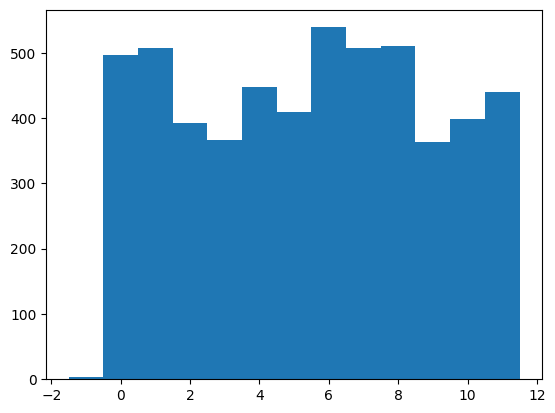

In [4]:
# for descriptive analysis look at central tendency measurements - mean, median, maybe mod
#   for variability look into standard deviation/variance/skewness
        # skewness can be found through using a histogram
        
# first, observe if there is any skewness in months
categories_month = clean_data['Month_Categorized'].value_counts().index
counts_month = clean_data['Month_Categorized'].value_counts().values

# this is also all over the place. these should be in order to make sense
plt.bar(categories_month, counts_month, width = 1)


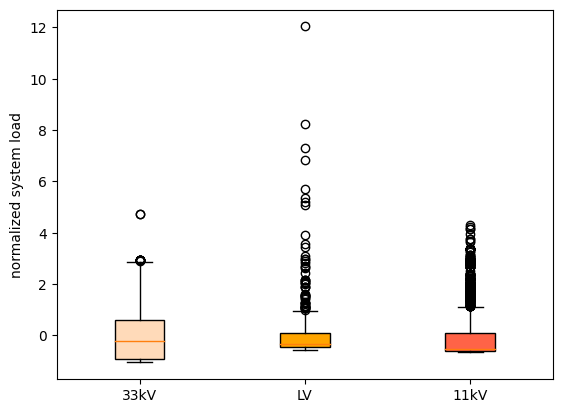

In [48]:
# For the sake of time, let's move ahead. how about we look at the number of customers affected 
# per system voltage

# first format the data accordingly by grouping it by system voltage


voltages_set = set(list(clean_data['System Voltage']))
voltages_set.remove(np.nan)

# print(voltages_set)

# first make a truth array

# try just '33kV' first
voltages_33kv_truth = list(clean_data['System Voltage'] == '33kV') 
load_arr_33kv = list(clean_data['System_Load (kW)'])

voltages_33kv = []
for i in range(len(voltages_33kv_truth)):
    if voltages_33kv_truth[i] is True:
        voltages_33kv.append(load_arr_33kv[i])
        
# print(voltages_33kv)

voltages_LV_truth = list(clean_data['System Voltage'] == 'LV') 
load_arr_LV = list(clean_data['System_Load (kW)'])

voltages_LV = []
for i in range(len(voltages_LV_truth)):
    if voltages_LV_truth[i] is True:
        voltages_LV.append(load_arr_LV[i])

# print(voltages_LV)
        
voltages_11kV_truth = list(clean_data['System Voltage'] == '11kV') 
load_arr_11kV = list(clean_data['System_Load (kW)'])

voltages_11kV = []
for i in range(len(voltages_11kV_truth)):
    if voltages_11kV_truth[i] is True:
        voltages_11kV.append(load_arr_11kV[i])

# print(voltages_11kV)

normalized_33kV = (voltages_33kv - np.mean(voltages_33kv))/np.std(voltages_33kv)
# print(normalized_33kV)

normalized_LV = (voltages_LV - np.mean(voltages_LV))/np.std(voltages_LV)
# print(normalized_LV)

normalized_11kV = (voltages_11kV - np.mean(voltages_11kV))/np.std(voltages_11kV)
# print(normalized_11kV)


normalized_voltages = [
    normalized_33kV,
    normalized_LV,
    normalized_11kV
]


# print(normalized_voltages)

# https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py
fig, ax = plt.subplots()
ax.set_ylabel('normalized system load')
bplot = ax.boxplot(normalized_voltages, patch_artist=True, labels=voltages_set)

colors = ['peachpuff', 'orange', 'tomato']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [ ]:
# for trends, look for if the data follows an exponential pattern.. etc
#   if exponential, it may benefit to take the log of the response variable
# for outliers, can use violin plot/box plot
# for correlations, can use a correlation matrix


In [ ]:
# transformations to the response variable can be done here
# I am not super familiar with all transformations, however, a common one that help lessen extremes in data is log

In [ ]:
# when creating the train/test split, use the line below, which enforces 30% of the data is considered testing data
# while 70% of the data is considered training data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# the function call above is from scikit learn



In [ ]:
# for regression models, linear/polynomial/logistic will likely not be what we will care for, but who knows?
# decision trees/random forest, ridge/llasso.. etc

# scikit will be extremely helpful here.
# https://scikit-learn.org/stable/modules/preprocessing.html can be looked into for transformations and mputing of missing values

In [ ]:
# for cross validation, refer to: https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
# for hyper parameter tuning, refer to: https://scikit-learn.org/stable/modules/grid_search.html

In [ ]:
# team with lowest RMSE wins
#  https://www.geeksforgeeks.org/rmse-root-mean-square-error-in-matlab/